In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, json
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
palette=['#2f4f4f','#228b22','#00ff00','#000080','#1e90ff','#00ffff','#ff8c00','#deb887','#8b4513','#ff0000','#ff69b4','#800080',]
# sns.palplot(palette)

Populating the interactive namespace from numpy and matplotlib


## After implementing util functions

In [ ]:
from nnn.util import *
from nnn.fileio import *
from nnn.processing import *
from nnn.plotting import *
import nnn.motif_fit as mf

file_list = ['./data/fitted_variant/NNNlib2b_DNA_20211216.CPvariant.gz',
             './data/fitted_variant/NNNlib2b_DNA_20211221_v8.CPvariant.gz',
             './data/fitted_variant/NNNlib2b_DNA_20211223_v6.CPvariant.gz']
dfs = [read_fitted_variant(fn) for fn in file_list]
legend = ['1216_v8', '1221_v8', '1223_v6']

plot_fitting_evaluation(dfs, legend, './fig/fitting_evaluation/v8_Nov11_reps.pdf')

## Old versions

In [2]:
def save_fig(filename, fig=None):
    if fig is None:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    else:
        fig.savefig(filename, dpi=300, bbox_inches='tight')

In [3]:
lib2 = pd.read_json('/Users/yuxi/workspace/nnn/data/fitted_variant/NNNlib2_expt_07262021_processing_v5_merged.json')
lib2b_final = pd.read_csv('/Users/yuxi/workspace/nnn/data/fitted_variant/NNNlib2b_DNA_20211022_v5.CPvariant.gz', sep='\t')
lib2b_init = pd.read_csv('/Users/yuxi/workspace/nnn/data/fitted_single_clusters/NNNlib2b_DNA_20211022_v1.CPvariant', sep='\t')

In [11]:
lib2b_vanilla = pd.read_csv('/Users/yuxi/workspace/nnn/data/fitted_variant/NNNlib2b_DNA_20211022_v4.CPvariant.gz', sep='\t')

In [19]:
df = lib2b_vanilla[['SEQID', 'RMSE_final']].merge(lib2b_final[['SEQID', 'RMSE_final']], on='SEQID')

In [20]:
df

,SEQID,RMSE_final_x,RMSE_final_y
0,MMACP3237,0.156717,0.151830
1,WC1242,0.168573,0.170051
2,WC553,0.327483,0.203374
3,SD10,0.092972,0.094150
4,MMCNN167,0.356028,0.118745
...,...,...,...
995,MMGTP3278,0.134954,0.156874
996,BNNN2641,0.145797,0.137806
997,BNNN4754,0.176564,0.169934
998,WC1649,0.324945,0.157055


<AxesSubplot:xlabel='RMSE_final_x', ylabel='RMSE_final_y'>

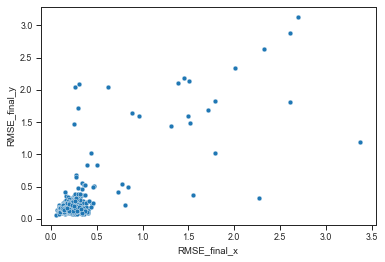

In [21]:
sns.scatterplot(data=df, x='RMSE_final_x', y='RMSE_final_y')

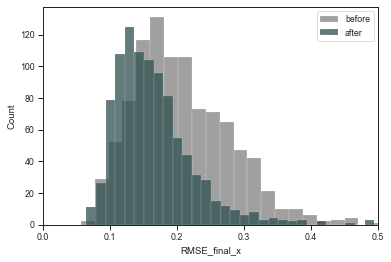

In [28]:
sns.histplot(df.RMSE_final_x, color='gray')
sns.histplot(df.RMSE_final_y, color=palette[0])
plt.legend(['before', 'after'])
plt.xlim([0,.5])
save_fig('./fig/before_after_fmax_est.pdf')

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.7727539454584762

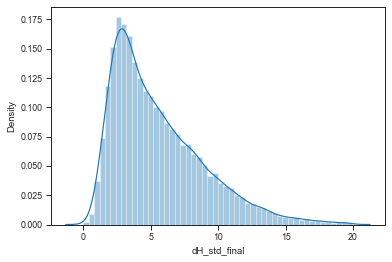

In [8]:
sns.distplot(lib2b_final.query('dH_std_final<20').dH_std_final)
lib2b_final.eval('dH_std_final<10').sum() / len(lib2b_final)

/Users/yuxi/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RMSE_final', ylabel='Density'>

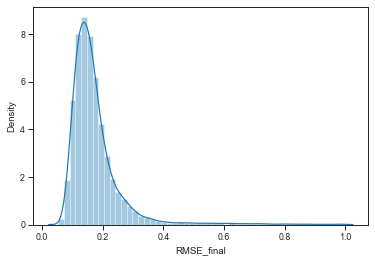

In [7]:
sns.distplot(lib2b_final.query('RMSE_final<1').RMSE_final)

<AxesSubplot:xlabel='fitFraction', ylabel='Count'>

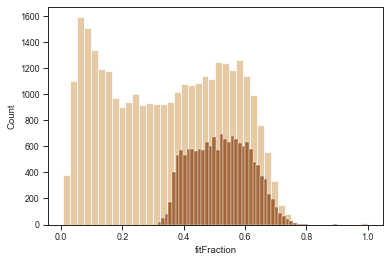

In [10]:
sns.histplot(lib2b_init.fitFraction, color=palette[7])
sns.histplot(lib2b_init.query('pvalue<0.01').fitFraction, color=palette[8])

In [3]:
lib2b = lib2b_final.merge(lib2b_init[['SEQID', 'numTests',
       'fitFraction', 'pvalue', 'dH_lb', 'dH', 'dH_ub', 'Tm_lb',
       'Tm', 'Tm_ub', 'fmax_lb', 'fmax', 'fmax_ub', 'fmin_lb', 'fmin',
       'fmin_ub', 'rsqr']], how='left', on='SEQID')

In [4]:
def get_dG(dH, Tm, t):
    return dH * (1 - (273.15 + t) / Tm)

In [5]:
lib2b['dG_37_final'] = get_dG(lib2b['dH_final'], lib2b['Tm_final'], t=37)
lib2b['dG_37'] = get_dG(lib2b['dH'], lib2b['Tm'], t=37)

In [9]:
lib2b_init.columns

Index(['SEQID', 'dH_init', 'Tm_init', 'fmax_init', 'fmin_init', 'numTests',
       'fitFraction', 'pvalue', 'numClusters', 'dH_lb', 'dH', 'dH_ub', 'Tm_lb',
       'Tm', 'Tm_ub', 'fmax_lb', 'fmax', 'fmax_ub', 'fmin_lb', 'fmin',
       'fmin_ub', 'rsqr', 'numIter', 'flag'],
      dtype='object')

In [12]:
lib2b_final.columns

Index(['SEQID', 'Green14_20_norm', 'Green14_20_norm_std', 'Green15_22.5_norm',
       'Green15_22.5_norm_std', 'Green16_25_norm', 'Green16_25_norm_std',
       'Green17_27.5_norm', 'Green17_27.5_norm_std', 'Green18_30_norm',
       'Green18_30_norm_std', 'Green19_32.5_norm', 'Green19_32.5_norm_std',
       'Green20_35_norm', 'Green20_35_norm_std', 'Green21_37.5_norm',
       'Green21_37.5_norm_std', 'Green22_40_norm', 'Green22_40_norm_std',
       'Green23_42.5_norm', 'Green23_42.5_norm_std', 'Green24_45_norm',
       'Green24_45_norm_std', 'Green25_47.5_norm', 'Green25_47.5_norm_std',
       'Green26_50_norm', 'Green26_50_norm_std', 'Green27_52.5_norm',
       'Green27_52.5_norm_std', 'Green28_55_norm', 'Green28_55_norm_std',
       'Green29_57.5_norm', 'Green29_57.5_norm_std', 'Green30_60_norm',
       'Green30_60_norm_std', 'RMSE_final', 'Tm_final', 'Tm_lb_final',
       'Tm_std_final', 'Tm_ub_final', 'chisquared_all_clusters',
       'chisquared_of_median', 'dH_final', 'dH_lb_final

(-25.0, 10.0)

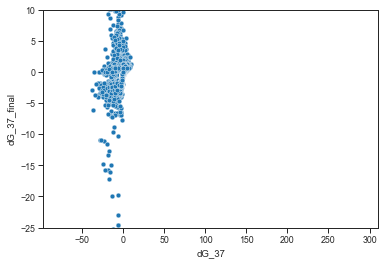

In [16]:
sns.scatterplot(data=lib2b, x='dG_37', y='dG_37_final')
plt.ylim([-25,10])

(-400.0, 1.0)

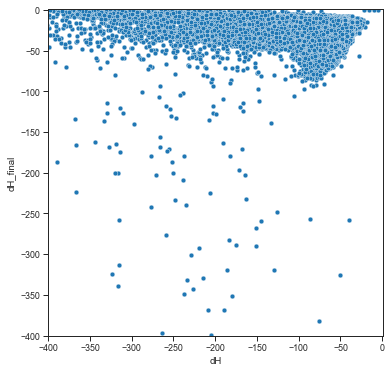

In [15]:
fig,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(data=lib2b, x='dH', y='dH_final')
lim = [-400, 1]
plt.xlim(lim)
plt.ylim(lim)

(290.0, 350.0)

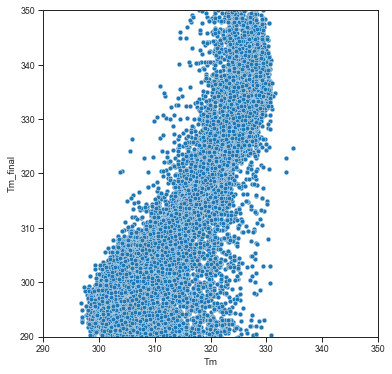

In [14]:
fig,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(data=lib2b, x='Tm', y='Tm_final')
plt.xlim([290,350])
plt.ylim([290,350])

(0.0, 1.0)

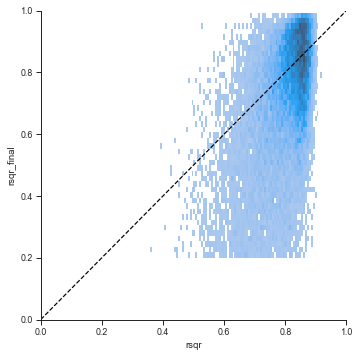

In [12]:
# fig,ax=plt.subplots(figsize=(6,6))
sns.displot(data=lib2b.query('rsqr_final>.2'), x='rsqr', y='rsqr_final')
lim = [0, 1]
plt.plot(lim, lim, 'k--')
plt.xlim(lim)
plt.ylim(lim)

In [13]:
# fig,ax=plt.subplots(figsize=(6,6))
def plot_comparism(df, col, lim, color='#deb887'):
    fig, ax = plt.subplots(figsize=(6,6))
    sns.scatterplot(data=df, x=col, y=col+'_final', color=color)
    plt.plot(lim, lim, 'k--')
    plt.xlim(lim)
    plt.ylim(lim)

In [14]:
# fig,ax=plt.subplots(figsize=(6,6))
def plot_dis_comparism(df, col, lim, color='#deb887'):
    # fig, ax = plt.subplots(figsize=(6,6))
    sns.displot(data=df, x=col, y=col+'_final', color=color)
    plt.plot(lim, lim, 'k--')
    plt.xlim(lim)
    plt.ylim(lim)

In [15]:
plot_dis_comparism(lib2b, 'rsqr', [0,1], color='orange')

Error in callback <function flush_figures at 0x7fadd89b5040> (for post_execute):


KeyboardInterrupt: 

In [12]:
plot_dis_comparism(lib2b, 'dH', [-400,1], color='orange')

NameError: name 'plot_dis_comparism' is not defined

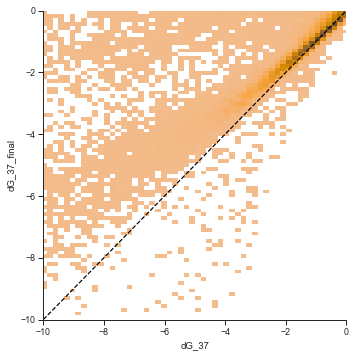

In [19]:
plot_dis_comparism(lib2b.query('dG_37_final >-10 & dG_37_final<0'), 'dG_37', [-10, 0], color='orange')

In [13]:
plot_comparism(lib2b.query('fmax_final > 0 & fmax_final<3'), 'fmax', [0, 3], color='orange')

NameError: name 'plot_comparism' is not defined

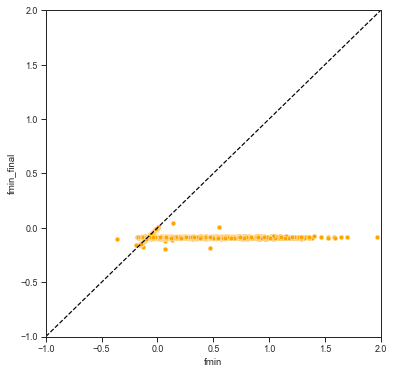

In [22]:
plot_comparism(lib2b.query('fmin_final > -1 & fmin_final<2'), 'fmin', [-1, 2], color='orange')

<AxesSubplot:xlabel='Tm_err', ylabel='Count'>

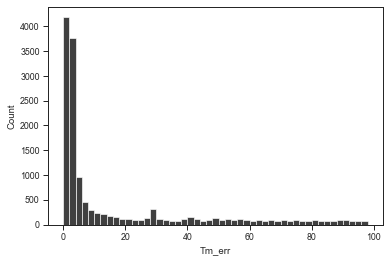

In [23]:
sns.histplot(lib2.Tm_err, bins=np.arange(0, 100, 2), color='k')

<AxesSubplot:ylabel='Count'>

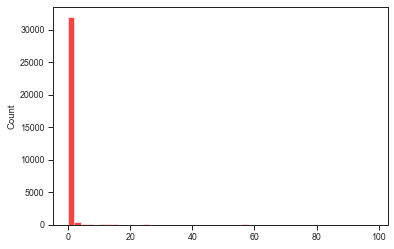

In [24]:
sns.histplot((lib2b.Tm_ub_final - lib2b.Tm_lb_final) / 4, bins=np.arange(0, 100, 2), color='r')

(0.0, 1.0)

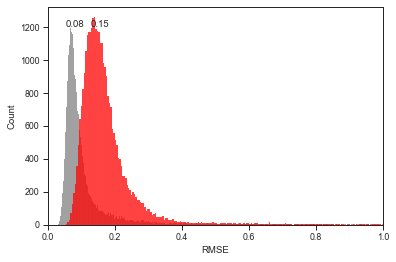

In [12]:
sns.histplot(lib2.RMSE, color='gray')
plt.text(x=np.median(lib2.RMSE), y=1200, s='%.2f'%np.median(lib2.RMSE), horizontalalignment='center')
sns.histplot(lib2b.RMSE_final, color='r')
plt.text(x=np.median(lib2b.RMSE_final), y=1200, s='%.2f'%np.median(lib2b.RMSE_final), horizontalalignment='center')
plt.xlim([0,1])

<AxesSubplot:xlabel='chisquared_all_clusters', ylabel='Count'>

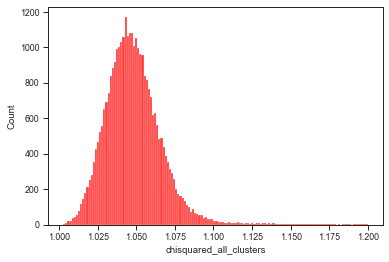

In [19]:
sns.histplot(lib2b.query('chisquared_all_clusters < 1.2').chisquared_all_clusters, color='r')

In [10]:
len(lib2b.query('rsqr_final>0')) / len(lib2b)

0.9431730442570802

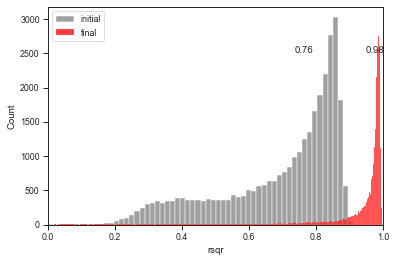

In [7]:
sns.histplot(lib2b.query('rsqr>0').rsqr, color='gray')
plt.text(x=np.median(lib2b.rsqr), y=2500, s='%.2f'%np.median(lib2b.rsqr), horizontalalignment='center')
sns.histplot(lib2b.query('rsqr_final>0').rsqr_final, color='r')
plt.text(x=np.median(lib2b.rsqr_final), y=2500, s='%.2f'%np.median(lib2b.rsqr_final), horizontalalignment='center')
plt.xlim([0,1])
plt.legend(['initial', 'final'])

In [29]:
lib2.columns

Index(['RefSeq', 'n_clusters_signal', 'dH', 'dH_err', 'dS', 'dS_err', 'dG_37C',
       'dG_37C_err', 'Tm', 'Tm_err', '15_Green_15C_redNorm_median',
       '15_Green_15C_redNorm_err', '15_Green_15C_redNorm_signal_median',
       '15_Green_15C_redNorm_signal_err', '16_Green_17.5C_redNorm_median',
       '16_Green_17.5C_redNorm_err', '16_Green_17.5C_redNorm_signal_median',
       '16_Green_17.5C_redNorm_signal_err', '17_Green_20C_redNorm_median',
       '17_Green_20C_redNorm_err', '17_Green_20C_redNorm_signal_median',
       '17_Green_20C_redNorm_signal_err', '18_Green_22.5C_redNorm_median',
       '18_Green_22.5C_redNorm_err', '18_Green_22.5C_redNorm_signal_median',
       '18_Green_22.5C_redNorm_signal_err', '19_Green_25C_redNorm_median',
       '19_Green_25C_redNorm_err', '19_Green_25C_redNorm_signal_median',
       '19_Green_25C_redNorm_signal_err', '20_Green_27.5C_redNorm_median',
       '20_Green_27.5C_redNorm_err', '20_Green_27.5C_redNorm_signal_median',
       '20_Green_27.5C_redN